In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['NDG', 'NAG']
di_sugar2= ['DGlcpNAca', 'DGlcpNAcb']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 2 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 2 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 168 
valid torsion1 and torsion2: (168, 168)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.I', '1.I'], ['-', '-'])
(['2.J', '1.J'], ['4C1', '1C4'])
(['2.G', '1.G'], ['-', '25B'])
(['2.B', '1.B'], ['1S3', '-'])
(['3.C', '2.C'], ['-', '-'])
(['2.B', '1.B'], ['1S3', '-'])
(['2.H', '1.H'], ['-', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['2.E', '1.E'], ['-', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.C', '1.C'], ['-', '-'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['2.A', '1.A'], ['-', '4C1'])
(['2.H', '1.H'], ['-', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.F', '1.F'], ['14B', '4C1'])
(['2.H', '1.H'], ['BO3', '-'])
(['2.F', '1.F'], ['4C1', '-'])
(['2.I', '1.I'], ['4C1', '-'])
(['2.O', '1.O'], ['3S1', '1S3'])
(['2.H', '1.H'], ['2SO', '-'])
(['2.L', '1.L'], ['4C1', '-'])
(['2.E', '1.E'], ['4C1', '-'])
(['4.D', '3.D'], ['-', '4C1'])
(['3.C', '2.C'], ['4C1', '4C1'])
(['2.E', '1.E'], ['O3B', '-'])
(['3.I', '1.I'], ['-', '4C1'])
(['2.H', '1.H'], ['1S3', 'OS2'])
(['2.F', '1.F'], ['25B', '-'])
(['2.I', '1.I'], ['4C1', '4C1'])
(['2.F', '1.F'], ['-', '4C1'])
(['2.C', '1.C'], ['4C1', 

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//1l5g.pdb I NDG 2 C1
../../pdbs//1l5g.pdb I NAG 1 O4
11598 11594
Connection found between(2) 11598 and 11594
../../pdbs//1l5g.pdb J NDG 2 C1
../../pdbs//1l5g.pdb J NAG 1 O4
11626 11622
Connection found between(2) 11626 and 11622
../../pdbs//1l5g.pdb G NDG 2 C1
../../pdbs//1l5g.pdb G NAG 1 O4
11542 11538
Connection found between(2) 11542 and 11538
../../pdbs//2dsu.pdb B NDG 2 C1
../../pdbs//2dsu.pdb B NAG 1 O4
2885 2881
Connection found between 2885 and 2881
../../pdbs//2fdm.pdb C NDG 3 C1
../../pdbs//2fdm.pdb C NAG 2 O4
2965 2961
Connection found between 2965 and 2961
../../pdbs//2fdm.pdb B NDG 2 C1
../../pdbs//2fdm.pdb B NAG 1 O4
2922 2918
Connection found between 2922 and 2918
../../pdbs//1q4g.pdb H NDG 2 C1
../../pdbs//1q4g.pdb H NAG 1 O4
9242 9238
Connection found between 9242 and 9238
../../pdbs//1q4g.pdb F NDG 2 C1
../../pdbs//1q4g.pdb F NAG 1 O4
9164 9160
Connection found between 9164 and 9160
../../pdbs//1q4g.pdb E NDG 2 C1
../../pdbs//1q4g.pdb E NAG 1 O4
9103 9099
C

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,1l5g.pdb,I NDG 2 C2 C1 NAG 1 O4 C4,I NDG 2 C1 NAG 1 O4 C4 C5,276.5376,237.2450,"([NDG(2_I_), NAG(1_I_)], [69.73, 68.58])",NDG(2_I_)-NAG(1_I_)-ASN(559_B_),DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.I, 1.I], [-, -])"
1,1l5g.pdb,J NDG 2 C2 C1 NAG 1 O4 C4,J NDG 2 C1 NAG 1 O4 C4 C5,205.9530,214.2850,"([NDG(2_J_), NAG(1_J_)], [97.28, 88.32])",NDG(2_J_)-NAG(1_J_)-ASN(654_B_),DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.J, 1.J], [4C1, 1C4])"
2,1l5g.pdb,G NDG 2 C2 C1 NAG 1 O4 C4,G NDG 2 C1 NAG 1 O4 C4 C5,174.2530,222.7770,"([NDG(2_G_), NAG(1_G_)], [97.64, 77.56])",NDG(2_G_)-NAG(1_G_)-ASN(943_A_),DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.G, 1.G], [-, 25B])"
3,2dsu.pdb,B NDG 2 C2 C1 NAG 1 O4 C4,B NDG 2 C1 NAG 1 O4 C4 C5,154.4020,218.7300,"([NDG(2_B_), NAG(1_B_)], [56.0, 32.79])",MAN(4_B_)-BMA(3_B_)-NDG(2_B_)-NAG(1_B_)-ASN(39...,DManpa1-4DManpb1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.B, 1.B], [1S3, -])"
4,2fdm.pdb,C NDG 3 C2 C1 NAG 2 O4 C4,C NDG 3 C1 NAG 2 O4 C4 C5,198.1740,117.1820,"([NDG(3_C_), NAG(2_C_)], [41.86, 43.96])",NAG(6_C_)-NAG(5_C_)-NAG(4_C_)-NDG(3_C_)-NAG(2_...,DGlcpNAcb1-4DGlcpNAcb1-4DGlcpNAcb1-4DGlcpNAca1...,"([3.C, 2.C], [-, -])"
...,...,...,...,...,...,...,...,...,...
163,2iit.pdb,F NDG 2 C2 C1 NAG 1 O4 C4,F NDG 2 C1 NAG 1 O4 C4 C5,224.8890,283.3700,"([NDG(2_F_), NAG(1_F_)], [58.45, 41.86])",NDG(2_F_)-NAG(1_F_)-ASN(229_A_),DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.F, 1.F], [4C1, 4C1])"
164,2iit.pdb,C NDG 2 C2 C1 NAG 1 O4 C4,C NDG 2 C1 NAG 1 O4 C4 C5,195.4310,101.7810,"([NDG(2_C_), NAG(1_C_)], [62.91, 52.34])",NDG(2_C_)-NAG(1_C_)-ASN(85_A_),DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.C, 1.C], [4C1, 4C1])"
165,1zu8.pdb,C NDG 2 C2 C1 NAG 1 O4 C4,C NDG 2 C1 NAG 1 O4 C4 C5,149.4550,239.7360,"([NDG(2_C_), NAG(1_C_)], [27.39, 24.16])",MAN(3_C_)-NDG(2_C_)-NAG(1_C_)-ASN(39_A_),DManpa1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.C, 1.C], [-, -])"
166,1u8e.pdb,L NDG 2 C2 C1 NAG 1 O4 C4,L NDG 2 C1 NAG 1 O4 C4 C5,165.4550,190.0090,"([NDG(2_L_), NAG(1_L_)], [69.39, 43.25])",BMA(3_L_)-NDG(2_L_)-NAG(1_L_)-ASN(281_B_),DManpb1-4DGlcpNAca1-4DGlcpNAcb1-ASN,"([2.L, 1.L], [1S3, 4C1])"


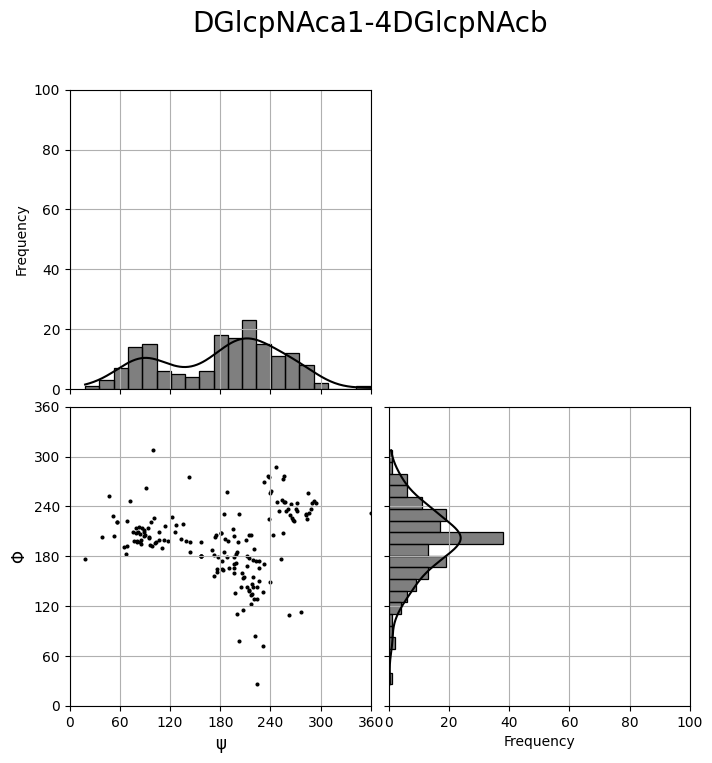

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)